In [1]:
from tensorflow._api.v2.compat.v1 import ConfigProto
from tensorflow._api.v2.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Libraries 

In [2]:
import tensorflow as tf                                                         # The main framework we will build our model with.
import numpy as np                                                              # Used for mathimatical operations.
import pandas as pd                                                             # Will be used to load our data frame.
import cv2                                                                      # Used for image processing.
from matplotlib import pyplot as plt                                            # Used for plottin our data.
from tensorflow.keras.utils import to_categorical                               # Utility in Tensorflow to convert our true category values.

### 1. Read data characters

In [3]:
path = 'D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\Datasets\Characters'              # Here we specify the path to our data location on my drive
char_train_data_x = pd.read_csv(path + '/csvTrainImages 13440x1024.csv', header=None)# Then we load the training images.
char_train_data_y = pd.read_csv(path + '/training labels.csv', header=None)    # Training labels.
char_test_data_x = pd.read_csv(path + '/csvTestImages 3360x1024.csv', header=None)   # Testing images.
char_test_data_y = pd.read_csv(path + '/testing labels.csv', header=None)       # Testing labels.

In [4]:
print('We have  %d training images each contains %d pixels.' %(char_train_data_x.shape[0], char_train_data_x.shape[1]))
print('We have  %d training labels each contains %d classes.' %(char_train_data_y.shape[0], len(char_train_data_y.value_counts())))
print('We have  %d testing images each contains %d pixels.' %(char_test_data_x.shape[0], char_test_data_x.shape[1]))
print('We have  %d testing labels each contains %d classes.' %(char_test_data_y.shape[0], len(char_test_data_y.value_counts())))

We have  13440 training images each contains 1024 pixels.
We have  13440 training labels each contains 28 classes.
We have  3360 testing images each contains 1024 pixels.
We have  3360 testing labels each contains 28 classes.


In [5]:
print("Label and total of data training per class :")
print(char_train_data_y.value_counts())
print("Label and total of data testing per class :")
print(char_test_data_y.value_counts())

Label and total of data training per class :
37    480
36    480
11    480
12    480
13    480
14    480
15    480
16    480
17    480
18    480
19    480
20    480
21    480
22    480
23    480
24    480
25    480
26    480
27    480
28    480
29    480
30    480
31    480
32    480
33    480
34    480
35    480
10    480
dtype: int64
Label and total of data testing per class :
37    120
36    120
11    120
12    120
13    120
14    120
15    120
16    120
17    120
18    120
19    120
20    120
21    120
22    120
23    120
24    120
25    120
26    120
27    120
28    120
29    120
30    120
31    120
32    120
33    120
34    120
35    120
10    120
dtype: int64


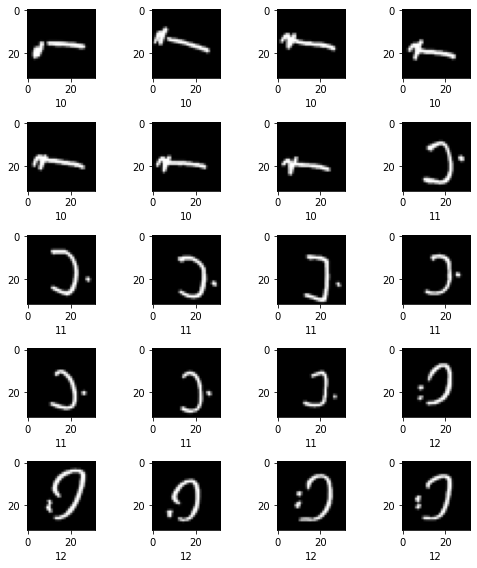

In [6]:
fig = plt.figure(figsize=(8, 8))                                                # Setting the figure size.
columns = 4                                                                     # Selecting the number of columns.
rows = 5                                                                        # Selectin the number of rows.
for i in range(1, columns*rows +1):                                             # Looping through rows & columns.
  img = char_train_data_x.iloc[i].to_numpy().reshape((32,32))                         # Reshaping the image into its size 32x32
  fig.add_subplot(rows, columns, i)                                             # Adding the image to the plot
  plt.xlabel(str(char_train_data_y.iloc[i,0]))
  plt.imshow(img, cmap='gray')                                                  # Showing the image using plt
  plt.tight_layout()
plt.show()                                                                      # Finally shpwing the whole plot containing all the subplots

### 2. Read dataset numbers

In [7]:
path = r'D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\Datasets\Numbers\resized'              # Here we specify the path to our data location on my drive
num_train_data_x = pd.read_csv(path + '/training_resized.csv', header=None)# Then we load the training images.
num_train_data_y = pd.read_csv(path + '/training labels.csv', header=None)    # Training labels.
num_test_data_x = pd.read_csv(path + '/testing_resized.csv', header=None)   # Testing images.
num_test_data_y = pd.read_csv(path + '/testing labels.csv', header=None)       # Testing labels.

In [8]:
print('We have  %d training images each contains %d pixels.' %(num_train_data_x.shape[0], num_train_data_x.shape[1]))
print('We have  %d training labels each contains %d classes.' %(num_train_data_y.shape[0], len(num_train_data_y.value_counts())))
print('We have  %d testing images each contains %d pixels.' %(num_test_data_x.shape[0], num_test_data_x.shape[1]))
print('We have  %d testing labels each contains %d classes.' %(num_test_data_y.shape[0], len(num_test_data_y.value_counts())))

We have  60000 training images each contains 1024 pixels.
We have  60000 training labels each contains 10 classes.
We have  10000 testing images each contains 1024 pixels.
We have  10000 testing labels each contains 10 classes.


In [9]:
print("Label and total of data training per class :")
print(num_train_data_y.value_counts())
print("Label and total of data testing per class :")
print(num_test_data_y.value_counts())

Label and total of data training per class :
9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64
Label and total of data testing per class :
9    1000
8    1000
7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
1    1000
0    1000
dtype: int64


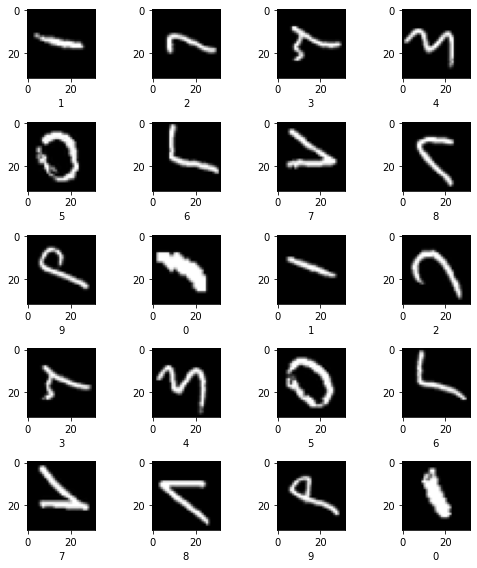

In [10]:
fig = plt.figure(figsize=(8, 8))                                                # Setting the figure size.
columns = 4                                                                     # Selecting the number of columns.
rows = 5                                                                        # Selectin the number of rows.
for i in range(1, columns*rows +1):                                             # Looping through rows & columns.
  img = num_train_data_x.iloc[i].to_numpy().reshape((32,32))                         # Reshaping the image into its size 32x32
  fig.add_subplot(rows, columns, i)                                             # Adding the image to the plot
  plt.xlabel(str(num_train_data_y.iloc[i,0]))
  plt.imshow(img, cmap='gray')                                                  # Showing the image using plt
  plt.tight_layout()
plt.show()  

### 3. Combine the dataset

In [33]:
training_data_images = pd.concat((char_train_data_x, num_train_data_x), axis=0) 
training_data_labels = pd.concat((char_train_data_y, num_train_data_y), axis=0)
print("Total Training images are {} images of shape".format(training_data_images.shape[0]))
print(training_data_images.shape, training_data_labels.shape)


testing_data_images = pd.concat((char_test_data_x, num_test_data_x), axis=0) 
testing_data_labels = pd.concat((char_test_data_y, num_test_data_y), axis=0)
print("Total Testing images are {} images of shape".format(testing_data_images.shape[0]))
print(testing_data_images.shape, testing_data_labels.shape)

Total Training images are 73440 images of shape
(73440, 1024) (73440, 1)
Total Testing images are 13360 images of shape
(13360, 1024) (13360, 1)


### 4. Preprocess dataset that are not properly rotated

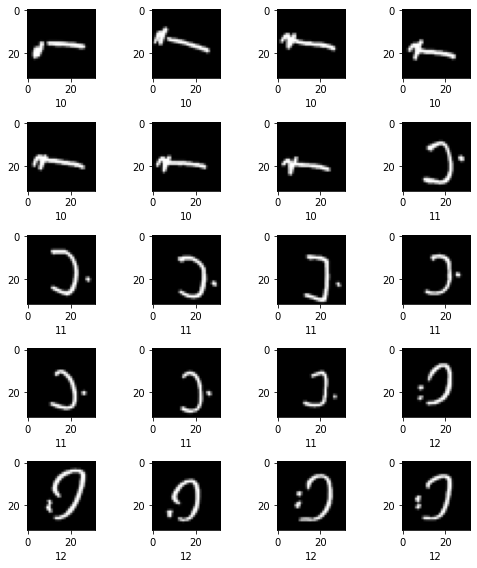

In [10]:
fig = plt.figure(figsize=(8, 8))                                                # Setting the figure size.
columns = 4                                                                     # Selecting the number of columns.
rows = 5                                                                        # Selectin the number of rows.
for i in range(1, columns*rows +1):                                             # Looping through rows & columns.
  img = training_data_images.iloc[i].to_numpy().reshape((32,32))                         # Reshaping the image into its size 32x32
  fig.add_subplot(rows, columns, i)                                             # Adding the image to the plot
  plt.xlabel(str(training_data_labels.iloc[i,0]))
  plt.imshow(img, cmap='gray')                                                  # Showing the image using plt
  plt.tight_layout()                                                  # Showing the image using plt
plt.show()                                                                      # Finally shpwing the whole plot containing all the subplots

In [11]:
def preprocess_data(train_data_x):
  train_data_x = train_data_x.to_numpy().reshape((train_data_x.shape[0], 32, 32)).astype('uint8')  #type must be uint8 for compatibility of arabic digits
  for i in range(len(train_data_x)):
    train_data_x[i] = cv2.rotate(train_data_x[i], cv2.ROTATE_90_CLOCKWISE)      # Rotating the images.
    train_data_x[i] = np.flip(train_data_x[i], 1)                               # Flipping the images
  train_data_x = train_data_x.reshape([-1, 32, 32, 1]).astype('uint8')          # Reshaping into the required size.
  train_data_x = train_data_x.astype('float32')/255                             # Here we normalize our images.
  return np.asarray(train_data_x)

In [12]:
train_x = preprocess_data(training_data_images)   # Returns an array of dimensions (73440,64,64,1).
test_x = preprocess_data(testing_data_images)     # Returns an array of dimensions (13360,64,64,1).

print(train_x.shape)
print(test_x.shape)

(73440, 32, 32, 1)
(13360, 32, 32, 1)


In [13]:
train_y = to_categorical(training_data_labels.values.astype('int32') - 1                # Returns an array of dimentions (13340, 38).
                         , num_classes=38)
test_y = to_categorical(testing_data_labels.values.astype('int32') - 1                  # Returns an array of dimentions (3360, 38).
                        , num_classes=38)
print(train_y.shape)
print(test_y.shape)

(73440, 38)
(13360, 38)


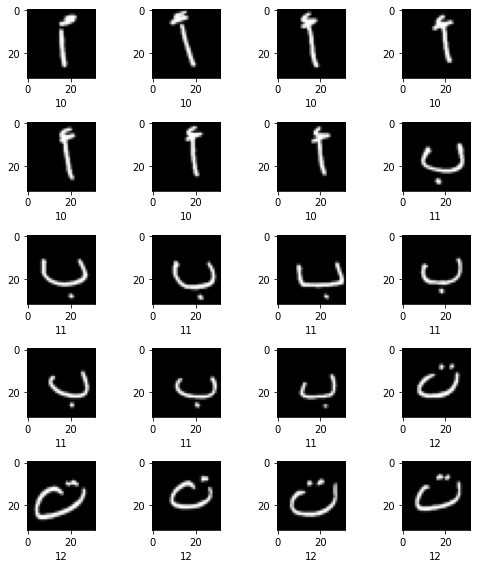

In [53]:
fig = plt.figure(figsize=(8, 8))                                                # Setting the figure size.
columns = 4                                                                     # Selecting the number of columns.
rows = 5                                                                        # Selectin the number of rows.
for i in range(1, columns*rows +1):                                             # Looping through rows & columns.
  img = train_x[i]                         # Reshaping the image into its size 32x32
  fig.add_subplot(rows, columns, i)                                             # Adding the image to the plot
  plt.xlabel(str(training_data_labels.iloc[i,0]))
  plt.imshow(img, cmap='gray')                                                  # Showing the image using plt
  plt.tight_layout()                                                  # Showing the image using plt
plt.show()                                                                      # Finally shpwing the whole plot containing all the subplots

In [14]:
from sklearn.utils import shuffle                                               # Importing shuffle function from sklearn library.
train_x, train_y = shuffle(train_x, train_y)                                    # Now we shuffle x & y in the training set.
test_x, test_y, shuffle(test_x, test_y)   

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

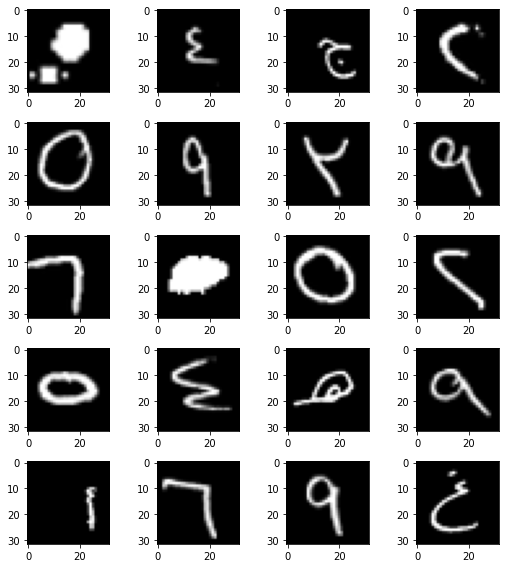

In [58]:
fig = plt.figure(figsize=(8, 8))                                                # Setting the figure size.
columns = 4                                                                     # Selecting the number of columns.
rows = 5                                                                        # Selectin the number of rows.
for i in range(1, columns*rows +1):                                             # Looping through rows & columns.
  img = train_x[i]                         # Reshaping the image into its size 32x32
  fig.add_subplot(rows, columns, i)                                             # Adding the image to the plot
  plt.imshow(img, cmap='gray')                                                  # Showing the image using plt
  plt.tight_layout()                                                  # Showing the image using plt
plt.show()                                                                      # Finally shpwing the whole plot containing all the subplots

### 5. Build model

In [15]:
def create_model(activation='relu', optimizer='adam', kernel_initializer='he_normal'):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 1), activation= activation, kernel_initializer=kernel_initializer),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(64, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(128, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(256, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.BatchNormalization(),

      tf.keras.layers.Flatten(),
      
      tf.keras.layers.Dense(32, activation= activation, kernel_initializer=kernel_initializer, kernel_regularizer='l2'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(38, activation= 'softmax', kernel_initializer=kernel_initializer)
  ])

  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [16]:
model = create_model()                                                          # Now we created an instance of a model with our custom architefture.
model.summary()      

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          2

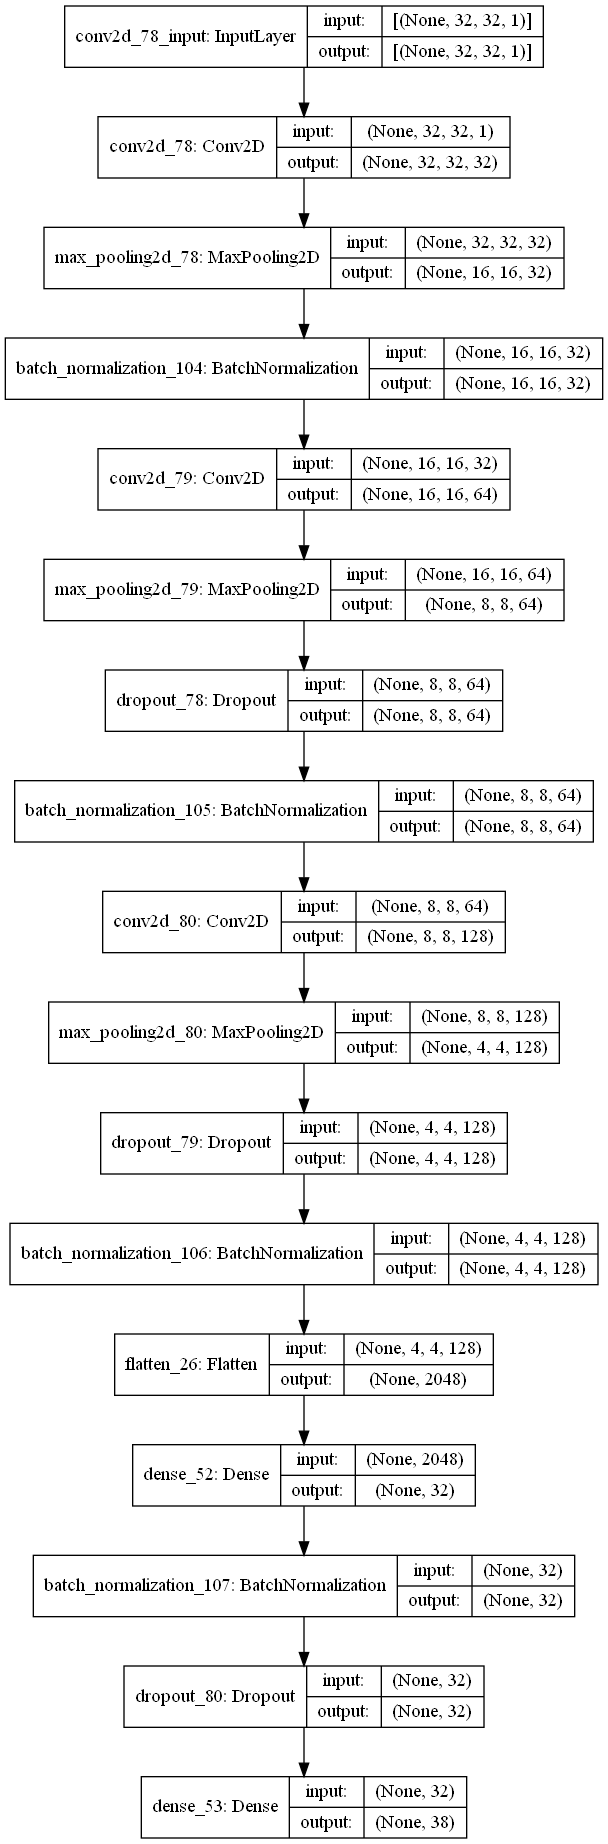

In [98]:
from tensorflow.keras.utils import plot_model
import pydot

plot_model(model, to_file="D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\model.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\model.png'))

In [32]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images

In [33]:
# batch_size = 64
# epochs = 50

# train_gen = datagen.flow(train_x, train_y, batch_size=batch_size)
# test_gen = datagen.flow(test_x, test_y, batch_size=batch_size)

In [97]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(73440, 32, 32, 1)
(73440, 38)
(13360, 32, 32, 1, 3)
(13360, 38)


In [64]:
seed = 999                                                                        # Select a fixed seed
np.random.seed(seed)                                                            # Specifing the seed for our random generator

optimizer = ['RMSprop', 'Adam', 'Adagrad', 'Nadam']                             # Available optimizers
kernel_initializer = ['normal', 'uniform']                                      # Available initializing methods
activation = ['relu', 'linear', 'tanh']                                         # Available activation functions

param_grid = dict(optimizer=optimizer,                                          # Creating the grid
                  kernel_initializer=kernel_initializer,
                  activation=activation)

parameters_number = 1
for x in param_grid:
  parameters_number = parameters_number * len(param_grid[x]) 
print("Number of different parameter combinations = {}".format(parameters_number))

Number of different parameter combinations = 24


In [65]:
epochs = 5                                                                      # Specifing the number of epochs for each combination
batch_size = 64                                                                 # Setting the batch size

# Here we will create our different models and run them for 5 epochs each.
for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    curr_model = create_model(optimizer=a, kernel_initializer=b, activation=c)
    curr_model.fit(train_x, train_y, 
                    validation_split=0.3,
                    epochs=epochs, batch_size=batch_size, verbose=1)
    print("=============================================================================")

{'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
Epoch 1/5
804/804 [==============================] - 22s 20ms/step - loss: 1.6678 - accuracy: 0.7840 - val_loss: 0.3018 - val_accuracy: 0.9355
Epoch 2/5
804/804 [==============================] - 16s 20ms/step - loss: 0.2705 - accuracy: 0.9450 - val_loss: 0.2292 - val_accuracy: 0.9532
Epoch 3/5
804/804 [==============================] - 17s 21ms/step - loss: 0.2118 - accuracy: 0.9565 - val_loss: 0.1785 - val_accuracy: 0.9700
Epoch 4/5
804/804 [==============================] - 17s 21ms/step - loss: 0.1851 - accuracy: 0.9645 - val_loss: 0.3312 - val_accuracy: 0.9209
Epoch 5/5
804/804 [==============================] - 17s 21ms/step - loss: 0.1738 - accuracy: 0.9668 - val_loss: 0.1446 - val_accuracy: 0.9770
{'optimizer': 'RMSprop', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Epoch 1/5
804/804 [==============================] - 19s 21ms/step - loss: 1.4021 - accuracy: 0.8064 - val_loss: 0.3500 - val_

In [16]:
model = create_model(optimizer='Rmsprop',                                       # We create our model with the specified hyper parameters
                     kernel_initializer='uniform',
                     activation='relu')

In [78]:
from tensorflow.keras.callbacks import ModelCheckpoint  # We will import a call back to save the best epoch's weights

checkpointer = ModelCheckpoint(filepath='D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\weights.hdf5', verbose=1, save_best_only=True)
history = model.fit(train_x,                                                    
                    train_y, 
                    validation_split= 0.3,                                      # The model will split the data into 30% of validation.
                    epochs=20,                                                  # We will run the model for 30 epochs
                    batch_size=64,                                              # We will have a batch size of 64
                    callbacks=[checkpointer])                                   # Finally we will use the imported callback

Epoch 1/20
804/804 [==============================] - 18s 20ms/step - loss: 1.4053 - accuracy: 0.8097 - val_loss: 0.3250 - val_accuracy: 0.9260

Epoch 00001: val_loss improved from inf to 0.32498, saving model to D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\weights.hdf5
Epoch 2/20
804/804 [==============================] - 16s 20ms/step - loss: 0.2594 - accuracy: 0.9473 - val_loss: 0.2107 - val_accuracy: 0.9559

Epoch 00002: val_loss improved from 0.32498 to 0.21068, saving model to D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\weights.hdf5
Epoch 3/20
804/804 [==============================] - 17s 21ms/step - loss: 0.2047 - accuracy: 0.9580 - val_loss: 0.2695 - val_accuracy: 0.9318

Epoch 00003: val_loss did not improve from 0.21068
Epoch 4/20
804/804 [==============================] - 16s 20ms/step - loss: 0.1795 - accuracy: 0.9650 - val_loss: 0.1828 - val_accuracy: 0.9646

Epoch 00004: val_loss improved from 0.21068 to 0.18282, saving 

In [46]:
# from tensorflow.keras.callbacks import ModelCheckpoint  # We will import a call back to save the best epoch's weights

# checkpointer = ModelCheckpoint(filepath='D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\\weights.hdf5', verbose=1, save_best_only=True)
# history = model.fit(train_gen,                                    # The model will split the data into 30% of validation.
#                     epochs=30,                                                  # We will run the model for 30 epochs
#                     batch_size=64,                                              # We will have a batch size of 64
#                     verbose=1,
#                     validation_data=test_gen,
#                     callbacks=[model_checkpoint_callback])                                   # Finally we will use the imported callback

Epoch 1/30
1148/1148 [==============================] - 34s 29ms/step - loss: 0.3994 - accuracy: 0.9251 - val_loss: 0.4123 - val_accuracy: 0.9164

Epoch 00001: val_accuracy improved from 0.88263 to 0.91639, saving model to D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\best.hdf5
Epoch 2/30
1148/1148 [==============================] - 34s 29ms/step - loss: 0.3481 - accuracy: 0.9375 - val_loss: 0.3935 - val_accuracy: 0.9253

Epoch 00002: val_accuracy improved from 0.91639 to 0.92530, saving model to D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\best.hdf5
Epoch 3/30
1148/1148 [==============================] - 34s 29ms/step - loss: 0.3182 - accuracy: 0.9428 - val_loss: 0.7171 - val_accuracy: 0.8220

Epoch 00003: val_accuracy did not improve from 0.92530
Epoch 4/30
1148/1148 [==============================] - 34s 30ms/step - loss: 0.3030 - accuracy: 0.9470 - val_loss: 0.4956 - val_accuracy: 0.8943

Epoch 00004: val_accuracy did not improve fro

Text(0.5, 1.0, 'Training and validation loss')

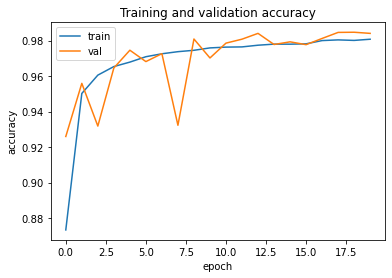

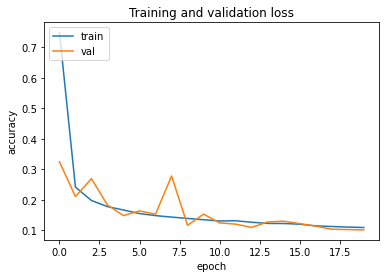

In [79]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')


plt.title('Training and validation loss')

In [80]:
model.save('D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\my_model.h5')

In [17]:
model = tf.keras.models.load_model('D:\AtlantisSeeker-UIN\Skripsi Imam\Arabic char and digits recognition\my_model.h5')                      # Now we load the model

In [21]:
def convert_categorical_label_to_real_label(categorical_label):
  real_labels = []
  real_labels.extend([x for x in range(10)])
  real_labels.extend(['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ى'])
  # print("{real_labels}\n",real_labels)
  return real_labels[categorical_label]

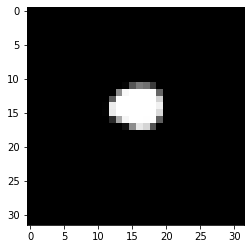

ن


In [23]:
test = cv2.imread(r'D:\AtlantisSeeker-UIN\Skripsi Imam\1\Arabic-Optical-Digit-Recognition-main\Handmade dataset\2022_01_22_0mt_Kleki (6).png')
test = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
test = cv2.resize(test, (32, 32))
plt.imshow(test, cmap='gray')
plt.show()
test = np.reshape(test, (-1, 32, 32, 1))
test = test.astype('float32')/255
print(convert_categorical_label_to_real_label(np.argmax(model.predict(test))))

# TRANSFER LEARNING

In [100]:
print(test_x.shape)  # (64, 224, 224)
rgb_batch = np.repeat(test_x[..., np.newaxis], 3, -1)
print(rgb_batch.shape)  # (64, 224, 224, 3)

(13360, 32, 32, 1)
(13360, 32, 32, 1, 3)


In [103]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=test_x[0].shape)
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(train_x) 
test_ds = preprocess_input(test_x)

ValueError: The input must have 3 channels; got `input_shape=(32, 32, 1)`